### Porque fazer Seleção de Features?



*   Algumas Features (Features não informativas) pode adicionar ruído ao modelo.
    * Exemplo: *nome, id, id_de_variaveis*
*   Modelos simples são explicativos, devemos evitar a perda da explicabilidade dos nossos modelos.
*   Muitas features podem causar problemas como tempos excessivos para treino, ou ainda dificuldades de colocar modelos em produção.





### Tipos de Algoritmos e Métodos

*   **Filter Methods** : Métodos de seleção que utiliza medidas estatísticas para atribuir um score para cada feature. As features são classificadas pelo score para serem mantidas ou removidas do modelo. Normalmente se usam testes univariados que consideram a independência da feature com a variável alvo. Exemplo: chi squared, scores com coeficiente de correlação.


*   **Wrapper Methods** : Métodos de seleção que selecionam um conjunto de features, onde diferentes combinações são preparadas, avaliadas e comparadas. Um modelo preditivo é usado para avaliar a combinação de features a atribuir um score baseado em uma acurácia de modelo. Exemplo: algoritmo RFE 



*   **Embedded Methods** : Métodos Embedded aprendem quais feature melhor contribuiem para a acurácia do modelo no momento de construção do modelo. Exemplo: métodos de penalização, algoritmos Lasso, Elastic NEt e Ridge Regression.


### Seleção de Features com Python

In [0]:
import pandas as pd

In [0]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', names=colnames)

In [4]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [0]:
X = df.drop(['class'], axis=1)
y = df['class']

### Testes estatísticos

- Usado para problemas de classificação.
- f_classif é adequado quando os dados são numéricos e a variável alvo é categórica.
- O mutual_info_classif é mais adequando quando não há uma dependência linear entre as features e a variável alvo.
- f_regression aplicado para problemas de regressão.

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

In [0]:
f_classif = SelectKBest(score_func=f_classif, k=4)

In [0]:
fit = f_classif.fit(X,y)

In [0]:
features = fit.transform(X)

In [11]:
print(features)

[[  6.  148.   33.6  50. ]
 [  1.   85.   26.6  31. ]
 [  8.  183.   23.3  32. ]
 ...
 [  5.  121.   26.2  30. ]
 [  1.  126.   30.1  47. ]
 [  1.   93.   30.4  23. ]]


In [12]:
cols = fit.get_support(indices=True)
df.iloc[:,cols]

,preg,plas,mass,age
0,6,148,33.6,50
1,1,85,26.6,31
2,8,183,23.3,32
3,1,89,28.1,21
4,0,137,43.1,33
...,...,...,...,...
763,10,101,32.9,63
764,2,122,36.8,27
765,5,121,26.2,30
766,1,126,30.1,47


#### Aplicando o Chi2

- Usado normalmente quando temos features categóricas e variável alvo categórica.

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [0]:
# feature extraction
test = SelectKBest(chi2, k=4)

In [0]:
fit = test.fit(X, y)

In [16]:
fit.get_support(indices=True)

array([1, 4, 5, 7])

In [0]:
features = fit.transform(X)

In [18]:
print(features)

[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 ...
 [121.  112.   26.2  30. ]
 [126.    0.   30.1  47. ]
 [ 93.    0.   30.4  23. ]]


In [19]:
cols = fit.get_support(indices=True)
df.iloc[:,cols]

,plas,test,mass,age
0,148,0,33.6,50
1,85,0,26.6,31
2,183,0,23.3,32
3,89,94,28.1,21
4,137,168,43.1,33
...,...,...,...,...
763,101,180,32.9,63
764,122,0,36.8,27
765,121,112,26.2,30
766,126,0,30.1,47


### Aplicando o Recursive Feature Elimination - RFE

- O Recursive Feature Elimination construindo modelos a partir da remoções de features.

- Utiliza a acurácia do modelo para identificar atributos ou a combinação destes que melhor contribui para uma melhor performance.

- Em grandes bases de dados o tempo de processamento pode ser um problema.

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

In [0]:
from sklearn.feature_selection import RFE

In [0]:
rfe = RFE(model, 4)

In [0]:
fit = rfe.fit(X, y)

In [24]:
print ("Número de features: {}".format(fit.n_features_))  

Número de features: 4


In [25]:
cols = fit.get_support(indices=True)
df.iloc[:,cols]

,preg,plas,mass,pedi
0,6,148,33.6,0.627
1,1,85,26.6,0.351
2,8,183,23.3,0.672
3,1,89,28.1,0.167
4,0,137,43.1,2.288
...,...,...,...,...
763,10,101,32.9,0.171
764,2,122,36.8,0.340
765,5,121,26.2,0.245
766,1,126,30.1,0.349


### Feature Importance

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
# feature extraction
model = RandomForestClassifier(n_estimators=10)
model.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
print(model.feature_importances_)

[0.0805051  0.25383268 0.09511771 0.06774806 0.06528796 0.18677426
 0.13028377 0.12045046]


In [29]:
colnames

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [0]:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

In [31]:
feature_importances

,importance
plas,0.253833
mass,0.186774
pedi,0.130284
age,0.120450
pres,0.095118
preg,0.080505
skin,0.067748
test,0.065288


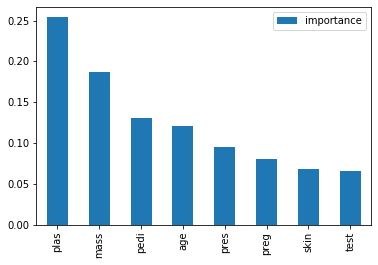

In [32]:
feature_importances.plot(kind='bar')

### Automatizando a Seleção de Features

- Se estiver usando scikit-learn podemos usar Pipelines para automatização.

In [0]:
from sklearn.pipeline import Pipeline

In [0]:
clf = Pipeline([
  ('feature_selection', RFE(LogisticRegression(max_iter=2000),4)),
  ('classification', RandomForestClassifier())
])

In [35]:
clf.fit(X, y)

Pipeline(memory=None,
         steps=[('feature_selection',
                 RFE(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                  dual=False,
                                                  fit_intercept=True,
                                                  intercept_scaling=1,
                                                  l1_ratio=None, max_iter=2000,
                                                  multi_class='auto',
                                                  n_jobs=None, penalty='l2',
                                                  random_state=None,
                                                  solver='lbfgs', tol=0.0001,
                                                  verbose=0, warm_start=False),
                     n_features_to_select=4, step=1, verbose=0)),
                ('classi...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        cl

In [36]:
clf.steps

[('feature_selection',
  RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=2000,
                                   multi_class='auto', n_jobs=None, penalty='l2',
                                   random_state=None, solver='lbfgs', tol=0.0001,
                                   verbose=0, warm_start=False),
      n_features_to_select=4, step=1, verbose=0)),
 ('classification',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_j

### Qual Método utilizar?

- Tente usar o RFE caso tenha recursos computacionais para isso.
- Se estiver trabalhando com Classificação e as features forem numéricas utilize f_classif ou mutual_info_classif.
- Se estiver trabalhando com Regressão e e as features forem numéricas utilize f_regression ou mutual_info_regression.
- Caso esteja trabalhando com features categóricas utilize chi2
- Automatize essa etapa com Pipelines para evitar erros.